# Data Analysis and Processing

## Data Inspection

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from astropy.table import Table
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, RobustScaler
from sklearn.linear_model import Ridge, RidgeCV,  Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.ensemble import GradientBoostingRegressor
from functions import rmse, rmse_kaggle
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore') 

C:\Users\Joe Fritch\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
df = pd.read_csv("data/train.csv")
train_id = df["Id"]
actual_price = df["SalePrice"]
df2 = pd.read_csv("data/test.csv")
test_id = df2["Id"]
submission_id = df2["Id"]
df2 = pd.concat([df2, pd.DataFrame(np.zeros(len(df2)), columns = ['SalePrice'])], axis = 1)
df = df.merge(df2, on = df.columns.tolist(), how = "outer")
df.set_index("Id", inplace = True)
del(df2)

In [3]:
df.sample(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
2333,60,RL,74.0,11002,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,0
2629,60,RL,60.0,18062,Pave,NaN,IR1,HLS,AllPub,CulDSac,...,0,NaN,NaN,NaN,0,9,2006,New,Partial,0
2205,50,RL,NaN,9260,Pave,Grvl,IR1,HLS,AllPub,Inside,...,0,NaN,NaN,NaN,0,3,2008,WD,Normal,0
2651,160,RL,24.0,2179,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,0
1987,20,RL,53.0,3710,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,3,2008,New,Partial,0
2091,190,RM,63.0,11426,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,0
1449,50,RL,70.0,11767,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdWo,NaN,0,5,2007,WD,Normal,112000
146,160,RM,24.0,2522,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,130000
2509,20,RL,75.0,11750,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,0


In [4]:
df.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [5]:
df.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [6]:
df['MSSubClass'] = df['MSSubClass'].astype(str)

In [7]:
df.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,90491.588215
std,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,106496.379333
min,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000
25%,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,0.000000
50%,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,34900.000000
75%,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,163000.000000
max,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


- Convert the GarageYrBlt from 2207 to 2007.

In [8]:
df[df['GarageYrBlt'] == df['GarageYrBlt'].max()]['GarageYrBlt'] = 2007

In [9]:
# https://codeburst.io/2-important-statistics-terms-you-need-to-know-in-data-science-skewness-and-kurtosis-388fef94eeaa
# Skewness of the data
df.drop(index = test_id).skew()
#df.drop(index = test_id).skew()[(df.drop(index = test_id).skew() > 1) | (df.drop(index = test_id).skew() < -1)]

MSSubClass        1.407657
LotFrontage       2.163569
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.669084
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.649415
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
SalePrice         1.882876
d

In [10]:
#Kurtosis is a measure of the "tailedness" of the probability distribution of a real-valued random variable.
df.drop(index = test_id).kurt()
#df.drop(index = test_id).kurt()[df.drop(index = test_id).kurt() > 3]

MSSubClass         1.580188
LotFrontage       17.452867
LotArea          203.243271
OverallQual        0.096293
OverallCond        1.106413
YearBuilt         -0.439552
YearRemodAdd      -1.272245
MasVnrArea        10.082417
BsmtFinSF1        11.118236
BsmtFinSF2        20.113338
BsmtUnfSF          0.474994
TotalBsmtSF       13.250483
1stFlrSF           5.745841
2ndFlrSF          -0.553464
LowQualFinSF      83.234817
GrLivArea          4.895121
BsmtFullBath      -0.839098
BsmtHalfBath      16.396642
FullBath          -0.857043
HalfBath          -1.076927
BedroomAbvGr       2.230875
KitchenAbvGr      21.532404
TotRmsAbvGrd       0.880762
Fireplaces        -0.217237
GarageYrBlt       -0.418341
GarageCars         0.220998
GarageArea         0.917067
WoodDeckSF         2.992951
OpenPorchSF        8.490336
EnclosedPorch     10.430766
3SsnPorch        123.662379
ScreenPorch       18.439068
PoolArea         223.268499
MiscVal          701.003342
MoSold            -0.404109
YrSold            -1

In [11]:
#fig, ax = plt.subplots(figsize=(5,3))
#sns.distplot(df.drop(index = test_id)['SalePrice'])
#plt.xticks(rotation=45)
#plt.savefig('images/SalePrice.png', dpi=300, bbox_inches='tight')

FileNotFoundError: [Errno 2] No such file or directory: 'images/OverallCorrelation1.png'

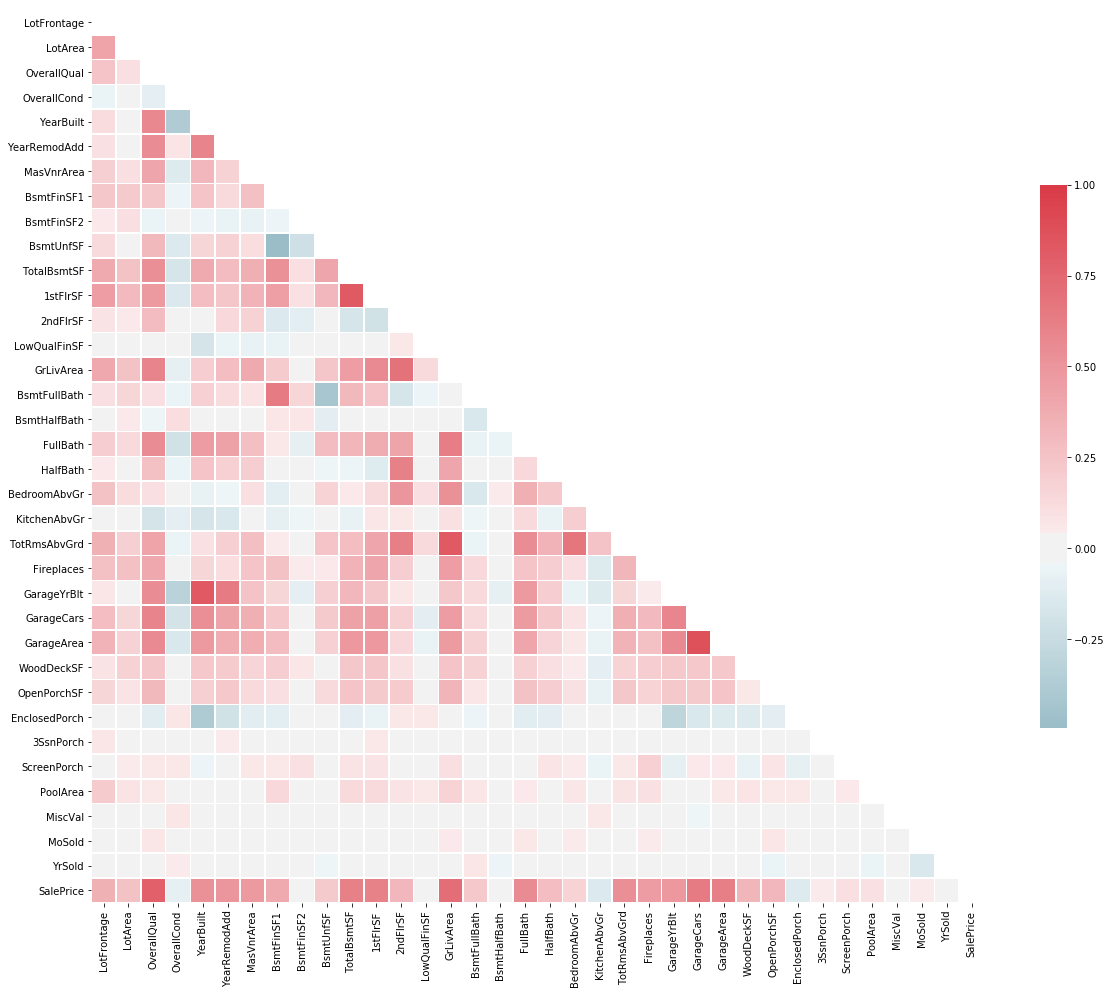

In [12]:
# Correlation
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html
train_correlation = df.drop(index = test_id).corr()

mask = np.zeros_like(train_correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(20, 20))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(train_correlation, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.savefig('images/OverallCorrelation1.png', dpi=300, bbox_inches='tight')

In [ ]:
df.drop(index = test_id)[['SalePrice', 'GrLivArea', 'TotRmsAbvGrd', 'TotalBsmtSF']].corr()

In [ ]:
df[df['GarageCars'] == 0][['GarageArea','GarageCars']].sum()
# GarageCars and GarageArea == 0
# Can multiply these features to make one

In [ ]:
df.drop(index = test_id)[['SalePrice', 'YearBuilt', 'GarageYrBlt']].corr()

## Missingness and Imputation

In [ ]:
missingness = df.isnull().sum(axis = 0).sort_values(ascending = False)/df.shape[0] * 100
missingness = missingness[missingness > 0]
missingness_names = missingness.index.tolist()
#f, ax = plt.subplots(figsize=(20, 20))
#sns.barplot(missingness_names, y = missingness)
#plt.xticks(rotation=90)
#plt.savefig('images/missingness.png', dpi=300, bbox_inches='tight')

In [ ]:
###############################################################################
############################ FILL IN MISSING DATA #############################
###############################################################################
# Columns with missing data
df.columns[df.isnull().any(axis = 0)]

## MISSINGNESS IN COLUMNS
df.isnull().sum(axis = 0).sort_values(ascending = False)
# Percent of missingness in each column
df.isnull().sum(axis = 0).sort_values(ascending = False)/df.shape[0]
missingness = df.isnull().sum(axis = 0).sort_values(ascending = False)/df.shape[0] * 100
missingness = missingness[missingness > 0]
missingness_names = missingness.index.tolist()
#sns.barplot(missingness_names, y = missingness)
#plt.xticks(rotation=90)
missingness

## MISSINGNESS IN ROWS
df.isnull().sum(axis = 1).sort_values(ascending = False)
# Percent of missingness in each row
df.isnull().sum(axis = 1).sort_values(ascending = False)/df.shape[1]

df.columns
df.columns[df.isnull().any(axis = 0)]

## MSZoning: Fill in with most common value
df['MSZoning'].value_counts()
sum(df['MSZoning'].isna())
df['MSZoning'].fillna("RL", inplace = True)
df.columns[df.isnull().any(axis = 0)]

## Filling in "NaN" in Alley with "None"
df['Alley'].value_counts()
sum(df['Alley'].isna())
df['Alley'].fillna("NA", inplace = True)
df.columns[df.isnull().any(axis = 0)]

## Filling in missing Utilities with AllPub (most common)
df['Utilities'].value_counts()
sum(df['Utilities'].isna())
df['Utilities'].fillna("AllPub", inplace = True)
df.columns[df.isnull().any(axis = 0)]

## Filling in Exterior1st and Exterior2nd with most common values
df['Exterior1st'].value_counts()
sum(df['Exterior1st'].isna())
df['Exterior1st'].fillna("VinylSd", inplace = True)
df['Exterior2nd'].value_counts()
sum(df['Exterior2nd'].isna())
df['Exterior2nd'].fillna("VinylSd", inplace = True)
df.columns[df.isnull().any(axis = 0)]

# MasVnrType: NaN values are the same for type and area -- assume "None" and "0"
mas_cols = ['MasVnrType', 'MasVnrArea', 'Exterior1st', 'Exterior2nd', 'YearBuilt', 'YearRemodAdd', 'Neighborhood']
mason = df[mas_cols]
# One observation where there is MasVnrArea, but no MasVnrType
df[df['MasVnrType'].isna()].index.difference(df[df['MasVnrArea'].isna()].index)
mason.loc[2611]
# Group by the year built, determine the most common
mason[mason['MasVnrType'] != 'None'].groupby(['YearBuilt']).agg(lambda x:x.value_counts().index[0])
# Alternatively, find MasVnrAreas that are within around the same range and find the most common
df[(df['MasVnrArea'] > 175) & (df['MasVnrArea'] < 225)]['MasVnrType'].value_counts()
# In both cases, the most common is "BrkFace"
df.loc[2611, 'MasVnrType'] == "BrkFace"
df['MasVnrType'].value_counts()
df['MasVnrType'].fillna("NA", inplace = True)
df['MasVnrArea'].fillna(0, inplace = True)
df.columns[df.isnull().any(axis = 0)]
del(mason, mas_cols)

# We decided to fill in the onemissing "Electrical" value with "SBrkr" since this is the most common one
df['Electrical'].value_counts()
df['Electrical'].fillna("SBrkr", inplace = True)
df.columns[df.isnull().any(axis = 0)]

# Kitchen
kitchen_cols = ['KitchenAbvGr', 'KitchenQual', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Neighborhood']
kitchen = df[kitchen_cols]
sum(df['KitchenQual'].isna())
kitchen[kitchen['KitchenQual'].isna()]['Neighborhood']
kitchen.groupby(['Neighborhood']).agg(lambda x:x.value_counts().index[0]).loc['ClearCr']
# Fill with most common KitchenQual value in the neighborhood
df['KitchenQual'].fillna("NA", inplace = True)
df.columns[df.isnull().any(axis = 0)]
del(kitchen ,kitchen_cols)

# Functional: fill mode
df['Functional'].fillna("Typ", inplace = True)
df.columns[df.isnull().any(axis = 0)]

# No fireplace
df['Fireplaces'].value_counts()
sum(df['FireplaceQu'].isna())
df['FireplaceQu'].fillna("NA", inplace = True)
df.columns[df.isnull().any(axis = 0)]

# Pool
pool_cols = ['PoolArea', 'PoolQC', 'YearBuilt', 'YearRemodAdd', 'OverallQual', 'OverallCond', 'Neighborhood']
sum(df['PoolQC'].isna())
pool = df[df['PoolArea'] > 0][pool_cols]
#pool['OverallQual'].hist()
#pool['OverallCond'].hist()
# Looking at the pools column, if another neighborhood has a pool just fill in using the rating found in that neighborhood.
# Neighborhoods NAmes and Mitchel
df.loc[2421, 'PoolQC'] = "Ex"
df.loc[2600, 'PoolQC'] = "Gd"
# For the remaining value, fill in based on the overall condition
pool.groupby(['OverallCond']).agg(lambda x:x.value_counts().index[0])
df.loc[2504,'PoolQC'] = "Ex"
df['PoolArea'].value_counts()
# Fill in remaining with NA
df['PoolQC'].fillna("NA", inplace = True)
df.columns[df.isnull().any(axis = 0)]
del (pool, pool_cols)

# No fence
df['Fence'].value_counts()
df['Fence'].fillna("NA", inplace = True)
df.columns[df.isnull().any(axis = 0)]

# Fill in MiscFeature
df['MiscVal'].value_counts()
df[(df['MiscVal'] != 0) & (df['MiscFeature'].isna())].index
df[df['MiscVal'] != 0]['MiscFeature'].value_counts()
df.loc[2550, 'MiscFeature'] = "Shed"
df['MiscFeature'].fillna("NA", inplace = True)
df.columns[df.isnull().any(axis = 0)]

# Fill in with most common SaleType
sum(df['SaleType'].isna())
df['SaleType'].value_counts()
df['SaleType'].fillna("WD", inplace = True)
df.columns[df.isnull().any(axis = 0)]

# Fill in lot frontage with the median lot frontage according to neighborhood
#We can impute the missing data with the log-transform of lot area, correlation ~0.68
lot_dict = df.groupby("Neighborhood").agg({"LotFrontage": "median"}).to_dict()
df['LotFrontage'] = df['LotFrontage'].fillna(df['Neighborhood'].apply(lambda x: lot_dict['LotFrontage'].get(x)))
#df[['LotFrontage', 'Neighborhood']].groupby('Neighborhood').agg("median")
#df[['LotFrontage','LotArea']].corr()
#pd.concat([df['LotFrontage'], np.log(df['LotArea'])], axis = 1).corr()
#df['LotFrontage'] = np.log(df['LotArea'])
df.columns[df.isnull().any(axis = 0)]

# GARAGE
garage_cols = ['GarageArea', 'GarageType', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'GarageFinish',
               'GarageCars', 'GarageQual', 'GarageCond', 'Neighborhood', 'SalePrice']

df[garage_cols].isna().sum(axis = 0)

garage = df[garage_cols]
df[df['GarageArea'].isna()].index
garage.groupby('GarageType').agg(lambda x: x.value_counts().index[0])
garage.groupby('GarageType').agg({'GarageArea': "median", 'GarageCars': "median",
              'GarageFinish': lambda x:x.value_counts().index[0],
              'GarageQual': lambda x:x.value_counts().index[0],
              'GarageCond': lambda x:x.value_counts().index[0]})
df.loc[2577, garage_cols]
df.loc[2577, 'GarageArea'] = 400
df.loc[2577, 'GarageYrBlt'] = 1923
df.loc[2577, 'GarageFinish'] = "Unf"
df.loc[2577, 'GarageCars'] = 2
df.loc[2577, 'GarageQual'] = "TA"
df.loc[2577, 'GarageCond'] = "TA"

df[garage_cols].isna().sum(axis = 0)

df[df['GarageQual'].isna()].index.difference(df[df['GarageType'].isna()].index)
df.loc[2127, garage_cols]
df.loc[2127, 'GarageYrBlt'] = 1910
df.loc[2127, 'GarageFinish'] = "Unf"
df.loc[2127, 'GarageQual'] = "TA"
df.loc[2127, 'GarageCond'] = "TA"

df[garage_cols].isna().sum(axis = 0)

garage_cols = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
for col in garage_cols:
    df[col].fillna("NA", inplace = True)

df['GarageYrBlt'].fillna(0, inplace = True)
for row in df.index:
    if (df.loc[row, 'GarageYrBlt'] == 0):
        df.loc[row, 'GarageYrBlt'] = df.loc[row, 'YearBuilt']

df.columns[df.isnull().any(axis = 0)]
del (garage, garage_cols)

# Basement
# BsmtQual: None
basement_cols = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
                 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','OverallQual', 'OverallCond',
                 'BsmtFullBath', 'BsmtHalfBath', 'Neighborhood']
df[basement_cols].isna().sum(axis = 0)
basement = df[basement_cols]
#for col in basement_cols:
#    print("Number of missing rows in {} is {}".format(col, sum(df[col].isna())))


df[df['BsmtFinSF1'].isna()].index
df.loc[2121, basement_cols]
cols = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']
for col in cols:
    df.loc[2121, col] = 0
cols = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']    
for col in cols:
    df.loc[2121, col] = "NA"    
df.loc[2121, basement_cols]

df[basement_cols].isna().sum(axis = 0)

df[df['BsmtFullBath'].isna()].index
df.loc[2189, basement_cols]
cols = ['BsmtFullBath', 'BsmtHalfBath']
for col in cols:
    df.loc[2189, col] = 0
cols = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']    
for col in cols:
    df.loc[2189, col] = "NA"  

df[basement_cols].isna().sum(axis = 0)

df[df['BsmtHalfBath'].isna()].index

basement.groupby('BsmtQual').agg(lambda x: x.value_counts().index[0])['BsmtCond']
df[df['BsmtCond'].isna()].index.difference(df[df['BsmtFinType1'].isna()].index)
df.loc[2041, basement_cols]
df.loc[2186, basement_cols]
df.loc[2525, basement_cols]

rows = [2041, 2186, 2525]
for row in rows:
    df.loc[row, 'BsmtCond'] = "TA"

df[basement_cols].isna().sum(axis = 0)

basement.groupby('BsmtCond').agg(lambda x: x.value_counts().index[0])['BsmtQual']
df[df['BsmtQual'].isna()].index.difference(df[df['BsmtFinType1'].isna()].index)
df.loc[2218, basement_cols]
df.loc[2219, basement_cols]

rows = [2218, 2219]
for row in rows:
    df.loc[row, 'BsmtQual'] = "TA"

df[basement_cols].isna().sum(axis = 0)

# Walkout / garden level walls - probably depends on area/neighborhood
df[df['BsmtExposure'].isna()].index.difference(df[df['BsmtFinType1'].isna()].index)
basement.groupby('Neighborhood').agg(lambda x: x.value_counts().index[0])[['BsmtExposure']]
df.loc[949, basement_cols]
df.loc[1488, basement_cols]
df.loc[2349, basement_cols]
df.loc[949, 'BsmtExposure'] = "No"
df.loc[1488, 'BsmtExposure'] = "No"
df.loc[2349, 'BsmtExposure'] = "No"

df[basement_cols].isna().sum(axis = 0)

# Fill with most common value in basement type 2 sqft > 450 and < 500
df[df['BsmtFinType2'].isna()].index.difference(df[df['BsmtFinType1'].isna()].index)
basement
df.loc[333, basement_cols]
df[(df['BsmtFinSF2'] > 450) & (df['BsmtFinSF2'] < 500)]['BsmtFinType2'].value_counts()
df.loc[333, 'BsmtFinType2'] = "Rec"

df[basement_cols].isna().sum(axis = 0)

# Fill remaining vaue
df[basement_cols].isna().sum(axis = 0)
cols = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
for col in cols:
    df[col].fillna("NA", inplace = True)

df[basement_cols].isna().sum(axis = 0)

df.columns[df.isna().any(axis = 0)]

#######################################################
# Dropping BsmtFinSF1, BsmtFinSF2, BsmtUnfSF - this is captured in TotalSF
df.drop(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF'], axis = 1, inplace = True)#######################################################
# Combine 1stFlrSF, 2ndFlrSF, and TotalBsmtSF
df['TotalSF'] = df['1stFlrSF'] + df['2ndFlrSF'] + df['TotalBsmtSF']
df = df.drop(['1stFlrSF', '2ndFlrSF', 'TotalBsmtSF'], axis = 1)#######################################################
# Combine BsmtFullBath, BsmtHalfBath, FullBath, HalfBath
df['Baths'] = df['BsmtFullBath'] + df['BsmtHalfBath']*0.5 + df['FullBath'] + df['HalfBath']*0.5
df.drop(['FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath'], axis = 1, inplace = True)
# Combine WoodDeckSF, OpenPorchSF, 3SsnPorch, ScreenPorch
df['PorchSF'] = df['WoodDeckSF'] + df['OpenPorchSF'] + df['3SsnPorch'] + df['ScreenPorch']
# Drop EnclosedPorch
df.drop('EnclosedPorch', axis = 1, inplace = True)

In [ ]:
###############################################################################
########################### SPLIT TRAIN AND TEST ##############################
###############################################################################
train = df.drop(index = test_id)
train = pd.concat([train.drop('SalePrice', axis = 1), train['SalePrice']], axis = 1)
#train.reset_index(drop = True, inplace = True)
test = df.drop(index = train_id)
#test.reset_index(drop = True, inplace = True)


num_features_columns = ['LotFrontage', 'LotArea', 'MasVnrArea', 'TotalSF', 'GrLivArea',
                'GarageArea', 'PorchSF', 'SalePrice']
num_features = train[num_features_columns]
#num_features.hist(figsize=(15,15))
#num_features['LotFrontage']

# https://seaborn.pydata.org/generated/seaborn.pairplot.html
#sns.pairplot(num_features)
#for column in num_features.columns:
#    if column != "SalePrice":
#        sns.jointplot(x = num_features[column], y = num_features['SalePrice'])

z = np.abs(stats.zscore(num_features))
threshold = 3
# Number of features dropped: 95
#len(num_features[(z > threshold).any(axis=1)].index.tolist())
#num_features[(z > threshold).any(axis=1)].index.tolist()
#train.drop(index = num_features[(z > threshold).any(axis=1)].index, inplace = True)

#sns.pairplot(train[num_features_columns])
#for column in num_features.columns:
#    if column != "SalePrice":
#        sns.jointplot(x = train[column], y = train['SalePrice'])

## Outliers

In [ ]:
# Manual removal of outliers
# LotFrontage
outliers = []

# LotFrontage
#sns.jointplot(x = train['LotFrontage'], y = train['SalePrice'])

train[['LotFrontage']].sort_values('LotFrontage', ascending = False)
train[np.abs(stats.zscore(train['LotFrontage'])) > 3]['LotFrontage'].sort_values(ascending = False)
#sns.jointplot(x = train['LotFrontage'].drop(index = [935, 1299]), y = train['SalePrice'].drop(index = [934,1298]))
#outliers.extend([935, 1299])
outliers

In [ ]:
# LotArea
#sns.jointplot(x = train['LotArea'], y = train['SalePrice'])
#plt.savefig('images/LotArea_before.png', dpi=300, bbox_inches='tight')
train[['LotArea']].sort_values('LotArea', ascending = False)
train[np.abs(stats.zscore(train['LotArea'])) > 3]['LotArea'].sort_values(ascending = False)
# Remove index 313, 335, 249, 706
#sns.jointplot(x = train['LotArea'].drop(index = [314, 336, 250, 707]), y = train['SalePrice'].drop(index = [313, 335, 249, 706]))
#plt.savefig('images/LotArea_after.png', dpi=300, bbox_inches='tight')
#outliers.extend([314, 336, 250, 707])

In [ ]:
# MasVnrArea - will not remove anything for now
#sns.jointplot(x = train['MasVnrArea'], y = train['SalePrice'])
#train[['MasVnrArea']].sort_values('MasVnrArea', ascending = False)
#train[np.abs(stats.zscore(train['MasVnrArea'])) > 3]['MasVnrArea'].sort_values(ascending = False)

In [ ]:
# TotalSF
#sns.jointplot(x = train['TotalSF'], y = train['SalePrice'])
train[['TotalSF']].sort_values('TotalSF', ascending = False)
train[np.abs(stats.zscore(train['TotalSF'])) > 3]['TotalSF'].sort_values(ascending = False)
#sns.jointplot(x = train['TotalSF'].drop(index = [524, 1299]), y = train['SalePrice'].drop(index = [524, 1298]))
#outliers.extend([524, 1299])

In [ ]:
# GrLivArea
#sns.jointplot(x = train['GrLivArea'], y = train['SalePrice'])
#plt.savefig('images/GrLivArea_before.png', dpi=300, bbox_inches='tight')
#train[['GrLivArea']].sort_values('GrLivArea', ascending = False)
#train[np.abs(stats.zscore(train['GrLivArea'])) > 3]['GrLivArea'].sort_values(ascending = False)
# Remove index 1299, 524
#sns.jointplot(x = train['GrLivArea'].drop(index = [524, 1299]), y = train['SalePrice'].drop(index = [524, 1299]))
#plt.savefig('images/GrLivArea_after.png', dpi=300, bbox_inches='tight')
outliers.extend([524, 1299])

In [ ]:
# GarageArea
#sns.jointplot(x = train['GarageArea'], y = train['SalePrice'])
train[['GarageArea']].sort_values('GarageArea', ascending = False)
train[np.abs(stats.zscore(train['GarageArea'])) > 3]['GarageArea'].sort_values(ascending = False)

In [ ]:
# PorchSF
#sns.jointplot(x = train['PorchSF'], y = train['SalePrice'])
train[['PorchSF']].sort_values('PorchSF', ascending = False)
train[np.abs(stats.zscore(train['PorchSF'])) > 3]['PorchSF'].sort_values(ascending = False)

In [ ]:
# SalePrice
#sns.distplot(train['SalePrice'])
train[['SalePrice']].sort_values('SalePrice', ascending = False)
train[np.abs(stats.zscore(train['SalePrice'])) > 3]['SalePrice'].sort_values(ascending = False)
#sns.distplot(np.log(train['SalePrice']))

In [ ]:
outliers = list(set(outliers))
#idx_rm = [934, 1298, 313, 335, 249, 706, 523, 129, 1190, 1328]
idx_rm = outliers
idx_rm

In [ ]:
train.drop(index = idx_rm, inplace = True)
actual_price.drop(index = idx_rm, inplace = True)
train_id = train.index

## Transformation

In [ ]:
###############################################################################
########################## DATA ANALYSIS ROUND 2 ##############################
###############################################################################
# Skewness of the data
train[num_features_columns].skew()
train[num_features_columns].skew()[(train[num_features_columns].skew() > 1) | (train[num_features_columns].skew() < -1)]

#Kurtosis is a measure of the "tailedness" of the probability distribution of a real-valued random variable.
train[num_features_columns].kurt()
train[num_features_columns].kurt()[train[num_features_columns].kurt() > 3]

########################## BOX-COX TRANSFORMATIONS ############################
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.jarque_bera.html
#http://dataunderthehood.com/2018/01/15/box-cox-transformation-with-python/
def normtesttab(x):
    nm_value, nm_p = stats.normaltest(x)
    jb_value, jb_p = stats.jarque_bera(x)
    data_rows = [('D’Agostino-Pearson', nm_value, nm_p),
                 ('Jarque-Bera', jb_value, jb_p)]
    t = Table(rows=data_rows, names=('Test name', 'Statistic', 'p-value'), 
              meta={'name': 'normal test table'},
          dtype=('S25', 'f8', 'f8'))
    print(x.name, "\n\n", t, "\n\n")


for col in num_features_columns:
    normtesttab(train[col])

for col in num_features_columns[:-1]:
    if ((min(train[col]) <= 0) & (min(test[col]) <= 0)):
        xt, maxlog, interval = stats.boxcox(train[col] + abs(min(train[col]))+1, alpha=0.05)
        print(col, ": Non-positive values found. Train lambda = {:g}".format(maxlog))
        xt, maxlog, interval = stats.boxcox(test[col] + abs(min(test[col]))+1, alpha=0.05)
        print(col, ": Non-positive values found. Test lambda = {:g}".format(maxlog), "\n")
    else:
        xt, maxlog, interval = stats.boxcox(train[col], alpha=0.05)
        print("All values in", col, "are positive. Train lambda = {:g}".format(maxlog))
        xt, maxlog, interval = stats.boxcox(test[col], alpha=0.05)
        print("All values in", col, "are positive. Test lambda = {:g}".format(maxlog), "\n")


In [ ]:
#sns.distplot(train['LotFrontage'])
#plt.savefig('images/LotFrontage_train_before_transformation.png', dpi=300, bbox_inches='tight')
#sns.distplot(test['LotFrontage'])
#plt.savefig('images/LotFrontage_test_before_transformation.png', dpi=300, bbox_inches='tight')
xt, lf_maxlog, interval = stats.boxcox(train['LotFrontage'], alpha=0.05)
xt, lf2_maxlog, interval = stats.boxcox(test['LotFrontage'], alpha=0.05)
print("lambda = {:g}".format(lf_maxlog))
print("lambda = {:g}".format(lf2_maxlog))
lf_lambda = ((lf_maxlog+lf2_maxlog)/2)
train['LotFrontage'] = (train['LotFrontage'])**lf_lambda
test['LotFrontage'] = (test['LotFrontage'])**lf_lambda
#sns.distplot(train['LotFrontage'])
#plt.savefig('images/LotFrontage_train_after_transformation.png', dpi=300, bbox_inches='tight')
#sns.distplot(test['LotFrontage'])
#plt.savefig('images/LotFrontage_test_after_transformation.png', dpi=300, bbox_inches='tight')

In [ ]:
#ax = plt.axes()
#sns.distplot(train['LotArea'])
#ax.set_title('LotArea Train Before Transformation')
#plt.savefig('images/LotArea_train_before_transformation.png', dpi=300, bbox_inches='tight')

In [ ]:
#ax = plt.axes()
#sns.distplot(test['LotArea'])
#ax.set_title('LotArea Test Before Transformation')
#plt.savefig('images/LotArea_test_before_transformation.png', dpi=300, bbox_inches='tight')

In [ ]:
#xt, la_maxlog, interval = stats.boxcox(train['LotArea'], alpha=0.05)
#xt, la2_maxlog, interval = stats.boxcox(test['LotArea'], alpha=0.05)
#print("lambda = {:g}".format(la_maxlog))
#print("lambda = {:g}".format(la2_maxlog))
#la_lambda = ((la_maxlog+la2_maxlog)/2)
#train['LotArea'] = (train['LotArea'])**la_lambda
#test['LotArea'] = (test['LotArea'])**la_lambda

In [ ]:
#ax = plt.axes()
#sns.distplot(train['LotArea'])
#ax.set_title('LotArea Train After Transformation')
#plt.savefig('images/LotArea_train_after_transformation.png', dpi=300, bbox_inches='tight')

In [ ]:
#ax = plt.axes()
#sns.distplot(test['LotArea'])
#ax.set_title('LotArea Test After Transformation')
#plt.savefig('images/LotArea_test_after_transformation.png', dpi=300, bbox_inches='tight')

In [ ]:
xt, ts_maxlog, interval = stats.boxcox(train['TotalSF'], alpha=0.05)
xt, ts2_maxlog, interval = stats.boxcox(test['TotalSF'], alpha=0.05)
print("lambda = {:g}".format(ts_maxlog))
print("lambda = {:g}".format(ts2_maxlog))
ts_lambda = ((ts_maxlog+ts2_maxlog)/2)

In [ ]:
#ax = plt.axes()
#sns.distplot(train['SalePrice'])
#ax.set_title('SalePrice Before Transformation')
#plt.savefig('images/SalePrice_before_transformation.png', dpi=300, bbox_inches='tight')

In [ ]:
train['SalePrice'] = np.log(train['SalePrice'])
train_columns = train.columns

In [ ]:
log_price = train.copy()['SalePrice']

In [ ]:
#ax = plt.axes()
#ax.set_title('SalePrice After Transformation')
#sns.distplot(train['SalePrice'])
#plt.savefig('images/SalePrice_after_transformation.png', dpi=300, bbox_inches='tight')

## Standardization

In [ ]:
###############################################################################
############################# STANDARDIZE DATA ################################
###############################################################################
train_columns = train.columns
to_scale = train[num_features_columns].drop(columns = "SalePrice")
colnames = to_scale.columns
scaler = StandardScaler()
scaler.fit(to_scale)
scaled_features = pd.DataFrame(scaler.transform(to_scale),
             columns = to_scale.columns, index = train.index)
scaler2 = StandardScaler()
scaler2.fit(train[['SalePrice']])
scaled_price = pd.DataFrame(scaler2.transform(train[['SalePrice']]),
                            columns = ['SalePrice'], index = train.index)

train_num = pd.concat([scaled_features, scaled_price], axis = 1)

train.drop(columns = num_features_columns, inplace = True)

train = pd.concat([train_num, train], axis = 1)[train_columns]

# Standardize test set
test_num = test[num_features_columns[:-1]]
test_num = pd.DataFrame(scaler.transform(test_num),
             columns = test_num.columns, index = test.index)


test.drop(columns = num_features_columns[:-1], inplace = True)

test = pd.concat([test_num, test], axis = 1)[train_columns]

df = train.merge(test, on = test.columns.tolist(), how = "outer")
ids = pd.DataFrame(pd.concat([pd.Series(train_id), pd.Series(test_id)], axis = 0), columns = ["Id"])
ids.reset_index(drop = True, inplace = True)
df.reset_index(drop = True, inplace = True)
df = pd.concat([df, ids], axis = 1).set_index("Id")

In [ ]:
df[num_features_columns].describe()

## Feature Engineering and Dummification

In [ ]:
###############################################################################
########################## CATEGORICAL  VARIABLES #############################
###############################################################################
df_fe = df.copy()
#######################################################
#PoolArea
df_fe['HasPool'] = [1 if x > 0 else 0 for x in df_fe['PoolArea'] ]
df_fe.drop('PoolArea', axis = 1, inplace = True)
###############################################################################
############################# DUMMIFY VARIABLES ###############################
###############################################################################
#######################################################
#MSSubClass
#sns.violinplot(df_fe['MSSubClass'], y = actual_price)
#sns.countplot(x='MSSubClass', data = df_fe)
dummy_df = pd.get_dummies(df_fe['MSSubClass'], drop_first=True, prefix = 'MSSubClass')
df_fe = pd.concat([df_fe, dummy_df], axis=1)
df_fe = df_fe.drop('MSSubClass', axis = 1)
#######################################################
#MSZoning
#sns.violinplot(x='MSZoning', y = 'SalePrice', data = df_fe.drop(index = test_id))
#sns.countplot(x='MSZoning', data = df_fe)
dummy_df = pd.get_dummies(df_fe['MSZoning'], drop_first=True, prefix = 'MSZoning')
df_fe = pd.concat([df_fe, dummy_df], axis=1)
df_fe = df_fe.drop('MSZoning', axis = 1)
#######################################################
#Lot Frontage
#######################################################
#Area
#######################################################
#Street
#sns.violinplot(df_fe['Street'], y = actual_price)
df.Street.value_counts()
df.drop(index=test_id).groupby('Street').agg({'SalePrice': 'mean'})
#sns.countplot(x='Street', data = df_fe)
dummy_df = pd.get_dummies(df_fe['Street'], drop_first=True, prefix = 'Street')
df_fe = pd.concat([df_fe, dummy_df], axis=1)
df_fe = df_fe.drop('Street', axis = 1)
#######################################################
#Alley
#sns.violinplot(df_fe['Alley'], y = actual_price)
df.drop(index=test_id).groupby('Alley').agg({'SalePrice': 'mean'})
df.Alley.value_counts()
#sns.countplot(x='Alley', data = df_fe)
dummy_df = pd.get_dummies(df_fe['Alley'], drop_first=True, prefix = 'Alley')
df_fe = pd.concat([df_fe, dummy_df], axis=1)
df_fe = df_fe.drop('Alley', axis = 1)
#######################################################
#LotShape
#sns.violinplot(df_fe['LotShape'], actual_price)
#sns.countplot(x='LotShape', data = df_fe)
dummy_df = pd.get_dummies(df_fe['LotShape'], drop_first=True, prefix = 'LotShape')
df_fe = pd.concat([df_fe, dummy_df], axis=1)
df_fe = df_fe.drop('LotShape', axis = 1)
#######################################################
#LandContour
#sns.violinplot(x='LandContour', y = 'SalePrice', data = df_fe.drop(index = test_id))
#sns.countplot(x='LandContour', data = df_fe)
dummy_df = pd.get_dummies(df_fe['LandContour'], drop_first=True, prefix = 'LandContour')
df_fe = pd.concat([df_fe, dummy_df], axis=1)
df_fe = df_fe.drop('LandContour', axis = 1)
#######################################################
#Utilities
#sns.violinplot(x='Utilities', y = 'SalePrice', data = df_fe.drop(index = test_id))
#sns.countplot(x='Utilities', data = df_fe)
df.Utilities.value_counts()
df_fe = df_fe.drop('Utilities', axis = 1)
#######################################################
#LotConfig
#sns.violinplot(x='LotConfig', y = 'SalePrice', data = df_fe.drop(index = test_id))
#sns.countplot(x='LotConfig', data = df_fe)
dummy_df = pd.get_dummies(df_fe['LotConfig'], drop_first=True, prefix = 'LotConfig')
df_fe = pd.concat([df_fe, dummy_df], axis=1)
df_fe = df_fe.drop('LotConfig', axis = 1)
#######################################################
#LandSlope
#sns.violinplot(x='LandSlope', y = 'SalePrice', data = df_fe.drop(index = test_id))
#sns.countplot(x='LandSlope', data = df_fe)
dummy_df = pd.get_dummies(df_fe['LandSlope'], drop_first=True, prefix = 'LandSlope')
df_fe = pd.concat([df_fe, dummy_df], axis = 1)
df_fe = df_fe.drop('LandSlope', axis = 1)
#######################################################
#Neighborhood
#sns.violinplot(x='Neighborhood', y = 'SalePrice', data = df_fe.drop(index = test_id))
#sns.countplot(x='Neighborhood', data = df_fe)
dummy_df = pd.get_dummies(df_fe['Neighborhood'], drop_first=True, prefix = 'Neighborhood')
df_fe = pd.concat([df_fe, dummy_df], axis=1)
df_fe = df_fe.drop('Neighborhood', axis = 1) 
#######################################################
#Condition1
#sns.violinplot(x='Condition1', y = 'SalePrice', data = df_fe.drop(index = test_id))
#sns.countplot(x='Condition1', data = df_fe)
dummy_df = pd.get_dummies(df_fe['Condition1'], drop_first=True, prefix = 'Condition1')
df_fe = pd.concat([df_fe, dummy_df], axis=1)
df_fe = df_fe.drop('Condition1', axis = 1)
#######################################################
#Condition2
#sns.violinplot(x='Condition2', y = 'SalePrice', data = df_fe.drop(index = test_id))
#sns.countplot(x='Condition2', data = df_fe)
dummy_df = pd.get_dummies(df_fe['Condition2'], drop_first=True, prefix = 'Condition2')
df_fe = pd.concat([df_fe, dummy_df], axis=1)
df_fe = df_fe.drop('Condition2', axis = 1)
#######################################################
#BldgType
#sns.violinplot(x='BldgType', y = 'SalePrice', data = df_fe.drop(index = test_id))
#sns.countplot(x='BldgType', data = df_fe)
dummy_df = pd.get_dummies(df_fe['BldgType'], drop_first=True, prefix = 'BldgType')
df_fe = pd.concat([df_fe, dummy_df], axis=1)
df_fe = df_fe.drop('BldgType', axis = 1)
#######################################################
#HouseStyle
#sns.violinplot(x='HouseStyle', y = 'SalePrice', data = df_fe.drop(index = test_id))
#sns.countplot(x='HouseStyle', data = df_fe)
dummy_df = pd.get_dummies(df_fe['HouseStyle'], drop_first = True, prefix = "HouseStyle")
df_fe = pd.concat([df_fe, dummy_df], axis = 1) 
df_fe = df_fe.drop('HouseStyle', axis = 1)
#######################################################
#OverallQual
#sns.violinplot(x='OverallQual', y = 'SalePrice', data = df_fe.drop(index = test_id))
#######################################################
#OverallCond
#sns.violinplot(x='OverallCond', y = 'SalePrice', data = df_fe.drop(index = test_id))
#######################################################
#YearBuilt
#sns.violinplot(x='YearBuilt', y = 'SalePrice', data = df_fe.drop(index = test_id))
#sns.jointplot(x='YearBuilt', y = 'SalePrice', data = df_fe.drop(index = test_id))
#######################################################
#YearRemodAdd
#sns.violinplot(x='YearRemodAdd', y = 'SalePrice', data = df_fe.drop(index = test_id))
#sns.jointplot(x='YearRemodAdd', y = 'SalePrice', data = df_fe.drop(index = test_id))
#######################################################
#RoofStyle
#sns.violinplot(x='RoofStyle', y = 'SalePrice', data = df_fe.drop(index = test_id))
#sns.countplot(x='RoofStyle', data = df_fe)
dummy_df = pd.get_dummies(df_fe['RoofStyle'], drop_first=True, prefix = 'RoofStyle')
df_fe = pd.concat([df_fe, dummy_df], axis=1)
df_fe = df_fe.drop('RoofStyle', axis = 1)
#######################################################
#RoofMatl
#sns.violinplot(x='RoofMatl', y = 'SalePrice', data = df_fe.drop(index = test_id))
#sns.countplot(x='RoofMatl', data = df_fe)
df.RoofMatl.value_counts()
df.drop(index = test_id).groupby('RoofMatl').agg({'SalePrice':'mean'})
dummy_df = pd.get_dummies(df_fe['RoofMatl'], drop_first=True, prefix = 'RoofMatl')
df_fe = pd.concat([df_fe, dummy_df], axis=1)
df_fe = df_fe.drop('RoofMatl', axis = 1)
#######################################################
#Exterior1st
#sns.violinplot(x='Exterior1st', y = 'SalePrice', data = df_fe.drop(index = test_id))
dummy_df = pd.get_dummies(df_fe['Exterior1st'], drop_first=True, prefix = 'Exterior1st')
df_fe = pd.concat([df_fe, dummy_df], axis=1)
df_fe = df_fe.drop('Exterior1st', axis = 1)
#######################################################
#Exterior2nd
#sns.violinplot(x='Exterior2nd', y = 'SalePrice', data = df_fe.drop(index = test_id))
dummy_df = pd.get_dummies(df_fe['Exterior2nd'], drop_first=True, prefix = 'Exterior2nd')
df_fe = pd.concat([df_fe, dummy_df], axis=1)
df_fe = df_fe.drop('Exterior2nd', axis = 1)
#######################################################
#MasVnrType
#sns.violinplot(x='MasVnrType', y = 'SalePrice', data = df_fe.drop(index = test_id))
dummy_df = pd.get_dummies(df_fe['MasVnrType'], drop_first=True, prefix = 'MasVnrType')
df_fe = pd.concat([df_fe, dummy_df], axis=1)
df_fe = df_fe.drop('MasVnrType', axis = 1)
#######################################################
#MasVnrArea
#######################################################
#ExterQual
#sns.violinplot(x='ExterQual', y = 'SalePrice', data = df_fe.drop(index = test_id))
#Set Ordinal Mapping
ord_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1,'NA':0}
df_fe['ExterQual'] = df_fe['ExterQual'].map(ord_map)
#######################################################
#ExterCond
#sns.violinplot(x='ExterCond', y = 'SalePrice', data = df_fe.drop(index = test_id))
#Set Ordinal Mapping
ord_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1,'NA':0}
df_fe['ExterCond'] = df_fe['ExterCond'].map(ord_map)
#######################################################
#Foundation
#sns.violinplot(x='Foundation', y = 'SalePrice', data = df_fe.drop(index = test_id))
dummy_df = pd.get_dummies(df_fe['Foundation'], drop_first=True, prefix = 'Foundation')
df_fe = pd.concat([df_fe, dummy_df], axis=1)
df_fe = df_fe.drop('Foundation', axis = 1)
#######################################################
#BsmtQual
#sns.violinplot(x='BsmtQual', y = 'SalePrice', data = df_fe.drop(index = test_id))
#Set Ordinal Mapping
ord_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1,'NA':0}
df_fe['BsmtQual'] = df_fe['BsmtQual'].map(ord_map)
#######################################################
#BsmtCond
#sns.violinplot(x='BsmtCond', y = 'SalePrice', data = df_fe.drop(index = test_id))
#Set Ordinal Mapping
ord_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1,'NA':0}
df_fe['BsmtCond'] = df_fe['BsmtCond'].map(ord_map)
#######################################################
#BsmtExposure
#sns.violinplot(x='BsmtExposure', y = 'SalePrice', data = df_fe.drop(index = test_id))
dummy_df = pd.get_dummies(df_fe['BsmtExposure'], drop_first=True, prefix = 'BsmtExposure')
df_fe = pd.concat([df_fe, dummy_df], axis=1)
df_fe = df_fe.drop('BsmtExposure', axis = 1)
#######################################################
#BsmtFinType1
#sns.violinplot(x='BsmtFinType1', y = 'SalePrice', data = df_fe.drop(index = test_id))
dummy_df = pd.get_dummies(df_fe['BsmtFinType1'], drop_first=True, prefix = 'BsmtFinType1')
df_fe = pd.concat([df_fe, dummy_df], axis=1)
df_fe = df_fe.drop('BsmtFinType1', axis = 1)
#######################################################
#BsmtFinType2
#sns.violinplot(x='BsmtFinType2', y = 'SalePrice', data = df_fe.drop(index = test_id))
dummy_df = pd.get_dummies(df_fe['BsmtFinType2'], drop_first=True, prefix = 'BsmtFinType2')
df_fe = pd.concat([df_fe, dummy_df], axis=1)
df_fe = df_fe.drop('BsmtFinType2', axis = 1)    
#######################################################
#Heating
#sns.violinplot(x='Heating', y = 'SalePrice', data = df_fe.drop(index = test_id))
dummy_df = pd.get_dummies(df_fe['Heating'], drop_first=True, prefix = 'Heating')
df_fe = pd.concat([df_fe, dummy_df], axis=1)
df_fe = df_fe.drop('Heating', axis = 1)
#######################################################
#HeatingQC
#sns.violinplot(x='HeatingQC', y = 'SalePrice', data = df_fe.drop(index = test_id))
#Set Ordinal Mapping
ord_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1,'NA':0}
df_fe['HeatingQC'] = df_fe['HeatingQC'].map(ord_map)
#######################################################
#CentralAir
#sns.violinplot(x='CentralAir', y = 'SalePrice', data = df_fe.drop(index = test_id))
dummy_df = pd.get_dummies(df_fe['CentralAir'], drop_first=True, prefix = 'CentralAir')
df_fe = pd.concat([df_fe, dummy_df], axis=1)
df_fe = df_fe.drop('CentralAir', axis = 1)
#######################################################
#Electrical
#sns.violinplot(x='Electrical', y = 'SalePrice', data = df_fe.drop(index = test_id))
dummy_df = pd.get_dummies(df_fe['Electrical'], drop_first=True, prefix = 'Electrical')
df_fe = pd.concat([df_fe, dummy_df], axis=1)
df_fe = df_fe.drop('Electrical', axis = 1)   
#######################################################
#LowQualFinSF
df_fe.drop('LowQualFinSF', axis = 1, inplace = True)
#######################################################
#GrLivArea
#######################################################
#BedroomAbvGr
#######################################################
#KitchenAbvGr
#######################################################
#KitchenQual
#sns.violinplot(x='KitchenQual', y = 'SalePrice', data = df_fe.drop(index = test_id))
#Set Ordinal Mapping
ord_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1,'NA':0}
df_fe['KitchenQual'] = df_fe['KitchenQual'].map(ord_map)
#######################################################
#TotRmsAbvGrd
#######################################################
#Functional
#sns.violinplot(x='Functional', y = 'SalePrice', data = df_fe.drop(index = test_id))
dummy_df = pd.get_dummies(df_fe['Functional'], drop_first=True, prefix = 'Functional')
df_fe = pd.concat([df_fe, dummy_df], axis=1)
df_fe = df_fe.drop('Functional', axis = 1)  
#######################################################
#Fireplaces
#######################################################
#FireplaceQu
#sns.violinplot(x='FireplaceQu', y = 'SalePrice', data = df_fe.drop(index = test_id))
#Set Ordinal Mapping
ord_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
df_fe['FireplaceQu'] = df_fe['FireplaceQu'].map(ord_map)
#######################################################
#GarageType
#sns.violinplot(x='GarageType', y = 'SalePrice', data = df_fe.drop(index = test_id))
dummy_df = pd.get_dummies(df_fe['GarageType'], drop_first=True, prefix = 'GarageType')
df_fe = pd.concat([df_fe, dummy_df], axis=1)
df_fe = df_fe.drop('GarageType', axis = 1)
#######################################################
#GarageYrBlt
#sns.violinplot(x='GarageYrBlt', y = 'SalePrice', data = df_fe.drop(index = test_id))
#sns.jointplot(x='GarageYrBlt', y = 'SalePrice', data = df_fe.drop(index = test_id))
#######################################################
#GarageFinish
#sns.violinplot(x='GarageFinish', y = 'SalePrice', data = df_fe.drop(index = test_id))
dummy_df = pd.get_dummies(df_fe['GarageFinish'], drop_first=True, prefix = 'GarageFinish')
df_fe = pd.concat([df_fe, dummy_df], axis=1)
df_fe = df_fe.drop('GarageFinish', axis = 1)   
#######################################################
#GarageArea
df_fe['GarageArea'] = df_fe['GarageArea']*df_fe['GarageCars']
#GarageCars
df_fe = df_fe.drop('GarageCars', axis = 1)
#######################################################
#GarageQual
#sns.violinplot(x='GarageQual', y = 'SalePrice', data = df_fe.drop(index = test_id))
#Set Ordinal Mapping
ord_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1,'NA':0}
df_fe['GarageQual'] = df_fe['GarageQual'].map(ord_map)
#######################################################
#GarageCond
#sns.violinplot(x='GarageCond', y = 'SalePrice', data = df_fe.drop(index = test_id))
#Set Ordinal Mapping
ord_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1,'NA':0}
df_fe['GarageCond'] = df_fe['GarageCond'].map(ord_map)
#######################################################
#PavedDrive
#sns.violinplot(x='PavedDrive', y = 'SalePrice', data = df_fe.drop(index = test_id))
dummy_df = pd.get_dummies(df_fe['PavedDrive'], drop_first=True, prefix = 'PavedDrive')
df_fe = pd.concat([df_fe, dummy_df], axis=1)
df_fe = df_fe.drop('PavedDrive', axis = 1)
#######################################################
#PoolQC
#sns.violinplot(x='PoolQC', y = 'SalePrice', data = df_fe.drop(index = test_id))
#Set Ordinal Mapping
ord_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1,'NA':0}
df_fe['PoolQC'] = df_fe['PoolQC'].map(ord_map)
#######################################################   
#Fence
#sns.violinplot(x='Fence', y = 'SalePrice', data = df_fe.drop(index = test_id))
dummy_df = pd.get_dummies(df_fe['Fence'], drop_first=True, prefix = 'Fence')
df_fe = pd.concat([df_fe, dummy_df], axis=1)
df_fe = df_fe.drop('Fence', axis = 1)  
#######################################################
#MiscFeature
#sns.violinplot(x='MiscFeature', y = 'SalePrice', data = df_fe.drop(index = test_id))
df_fe.drop(index = test_id)['MiscFeature'].value_counts()
df_fe.drop(index = train_id)['MiscFeature'].value_counts()
#dummy_df = pd.get_dummies(df_fe['MiscFeature'], drop_first=True, prefix = 'MiscFeature')
#df_fe = pd.concat([df_fe, dummy_df], axis=1)
#df_fe = df_fe.drop('MiscFeature', axis = 1) 
df_fe.drop('MiscFeature', axis = 1, inplace = True)
#######################################################
#MiscVal
#sns.jointplot(x='MiscVal', y = 'SalePrice', data = df_fe.drop(index = test_id))
df_fe.drop('MiscVal', axis = 1, inplace = True)
#######################################################
#MoSold
#Dummify
#sns.jointplot(x='MoSold', y = 'SalePrice', data = df_fe.drop(index = test_id))
#######################################################
#YrSold
#Dummify
#sns.jointplot(x='YrSold', y = 'SalePrice', data = df_fe.drop(index = test_id))
#######################################################
#SaleType
#sns.violinplot(x='SaleType', y = 'SalePrice', data = df_fe.drop(index = test_id))
dummy_df = pd.get_dummies(df_fe['SaleType'], drop_first=True, prefix = 'SaleType')
df_fe = pd.concat([df_fe, dummy_df], axis=1)
df_fe = df_fe.drop('SaleType', axis = 1) 
#######################################################
#SaleCondition
#sns.violinplot(x='SaleCondition', y = 'SalePrice', data = df_fe.drop(index = test_id))
dummy_df = pd.get_dummies(df_fe['SaleCondition'], drop_first=True, prefix = 'SaleCondition')
df_fe = pd.concat([df_fe, dummy_df], axis=1)
df_fe = df_fe.drop('SaleCondition', axis = 1) 
#######################################################
#SalePrice


df_fe['TotalSF']  = df_fe['TotalSF'] + df_fe['GrLivArea']
df_fe = df_fe.drop('GrLivArea', axis = 1) 


del (dummy_df, ord_map)

df_fe.columns[df_fe.isnull().any(axis = 0)]

## Final Data 

In [ ]:
num_features_columns = ['LotFrontage', 'LotArea', 'MasVnrArea', 'TotalSF',# 'GrLivArea',
                'GarageArea', 'PorchSF', 'SalePrice']

df_fe[num_features_columns].describe()
# https://codeburst.io/2-important-statistics-terms-you-need-to-know-in-data-science-skewness-and-kurtosis-388fef94eeaa
# Skewness of the data
df_fe[num_features_columns].drop(index = test_id).skew()
df_fe[num_features_columns].drop(index = test_id).skew()[(df_fe[num_features_columns].drop(index = test_id).skew() > 1) | (df_fe[num_features_columns].drop(index = test_id).skew() < -1)]

#Kurtosis is a measure of the "tailedness" of the probability distribution of a real-valued random variable.
df_fe[num_features_columns].drop(index = test_id).kurt()
df_fe[num_features_columns].drop(index = test_id).kurt()[df_fe[num_features_columns].drop(index = test_id).kurt() > 3]


In [ ]:
sns.jointplot(df_fe.drop(index = test_id)['TotalSF'], df_fe.drop(index = test_id)['SalePrice'])

In [ ]:
sns.jointplot(df_fe.drop(index = test_id)['GarageArea'], df_fe.drop(index = test_id)['SalePrice'])

In [ ]:
# Correlation
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html
fe_train_correlation = df_fe[num_features_columns].drop(index = test_id).corr()

mask = np.zeros_like(fe_train_correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(10, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(fe_train_correlation, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

train = df_fe.drop(index = test_id)
test = df_fe.drop(columns = 'SalePrice', index = train_id)

# Models

## Ridge Regression

In [ ]:
features = train.drop(columns = 'SalePrice')
price = train['SalePrice']
features_test = test.copy()

In [ ]:
ridge = Ridge()
alphas = np.logspace(-3, 6, 100)
ridge.set_params(normalize=False)
coefs  = []
scores = []
for alpha in alphas:
        ridge.set_params(alpha=alpha)
        ridge.fit(features, price)  
        coefs.append(ridge.coef_)
        scores.append(ridge.score(features, price))
coefs = pd.DataFrame(coefs, index = alphas, columns = features.columns)  

In [ ]:
plt.rcParams['figure.figsize'] = (10,5)
for name in coefs.columns:
    plt.xscale('log')
    plt.plot(coefs.index, coefs[name], label=name)
plt.title('Ridge coefficients as a function of the regularization')
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'slope values')
plt.savefig('images/Ridge_coef.png', dpi=300, bbox_inches='tight')

In [ ]:
ridge_cv = RidgeCV()
ridge_cv.set_params(alphas = alphas, cv = 5)
ridge_cv.fit(features, price)
ridge.set_params(alpha = ridge_cv.alpha_)
ridge.fit(features, price)

In [ ]:
ridge_pred_train = ridge.predict(features)
ridge_pred_train_unscaled = np.exp(scaler2.inverse_transform(ridge_pred_train))

In [ ]:
print(rmse(ridge_pred_train, price))

In [ ]:
print(rmse_kaggle(np.array(real_price), ridge_pred_train_unscaled))

In [ ]:
sns.distplot(real_price, color="skyblue", label="Actual Price")
sns.distplot(ridge_pred_train_unscaled , color="red", label="Predicted Price")
plt.legend()


In [ ]:
sns.residplot(np.array(price), ridge_pred_train).set_title('Residuals')


In [ ]:
residuals = price - ridge_pred_train
outliers = residuals[np.abs(stats.zscore(residuals)) > 3].index.tolist()
#plt.savefig('images/Ridge_prediction_residuals.png', dpi=300, bbox_inches='tight')

In [ ]:
sns.jointplot(actual_price, np.exp(scaler2.inverse_transform(ridge_pred_train)))
#plt.savefig('images/Ridge_prediction_saleprice_scatter.png', dpi=300, bbox_inches='tight')

In [ ]:
############################## IMPORTANT NOTE #################################
# To transform our predicted price BACK:

#sns.distplot(df.drop(index = test_id)['SalePrice'])
#plt.xticks(rotation=45)
#plt.savefig('images/SalePrice.png', dpi=300, bbox_inches='tight')
ridge_pred = np.exp(scaler2.inverse_transform(ridge.predict(features_test)))
fig, ax = plt.subplots(figsize=(10,8))
sns.distplot( actual_price , color="skyblue", label="Actual Price")
sns.distplot( ridge_pred_train_unscaled , color="red", label="Predicted Train Price")
sns.distplot( ridge_pred , color="green", label="Predicted Test Price")
ax.set_title('Sale Price, Ridge Regression')
#plt.legend()
#plt.savefig('images/Ridge_prediction_saleprice_histogram.png', dpi=300, bbox_inches='tight')

ridge_pred = pd.DataFrame(ridge_pred, columns = ['SalePrice'])

ridge_cv_submission = pd.concat([submission_id, ridge_pred], axis = 1)
#ridge_cv_submission.to_csv("data/ridge_TSF+GR_Mar3.csv", index = False)

## Lasso Regression

In [ ]:
#Lasso
lasso = Lasso()
lasso.fit(features, price)
#print('the lasso intercept is: %.2f' %(lasso.intercept_))
#pd.Series(lasso.coef_, index=features.columns)

alphas = np.logspace(-3, 0.25, 100)

lasso_cv = LassoCV()
lasso_cv.set_params(alphas = alphas, cv = 5)
lasso_cv.fit(features, price)
lasso_cv.score(features, price)
lasso_cv.alpha_
lasso_cv.predict(features)
lasso.set_params(alpha = lasso_cv.alpha_)
lasso.fit(features, price)

In [ ]:
lasso_pred_train = lasso.predict(features)
lasso_pred_train_unscaled = np.exp(scaler2.inverse_transform(lasso_pred_train))

In [ ]:
print(rmse(lasso_pred_train, price))
print(rmse_kaggle(np.array(real_price), lasso_pred_train_unscaled))

In [ ]:
cross_val_score(lasso, features, price, cv=5)

In [ ]:
sns.distplot( actual_price , color="skyblue", label="Actual Price")
sns.distplot( np.exp(scaler2.inverse_transform(lasso.predict(features))) , color="red", label="Predicted Price")
plt.legend()

In [ ]:
sns.residplot(price, lasso_pred_train)
residuals = price - lasso_pred_train
outliers.extend(residuals[np.abs(stats.zscore(residuals)) > 3].index.tolist())
# Outliers where the residuals are more than 3 standard deviations away.

In [ ]:
sns.jointplot(actual_price, np.exp(scaler2.inverse_transform(lasso_pred_train)))

In [ ]:
lasso_coef = pd.DataFrame(lasso.coef_, index = features.columns, columns = ["Coefficients"])
lasso_coef.abs()
lasso_coef.sort_values("Coefficients", inplace = True)
top_coef = pd.concat([lasso_coef.head(15), lasso_coef.tail(15)], axis = 0)
top_coef.plot(kind = "barh", figsize=(15,15), title = "Feature Importance")

In [ ]:
############################## IMPORTANT NOTE #################################
# To transform our predicted price BACK:

#sns.distplot(df.drop(index = test_id)['SalePrice'])
#plt.xticks(rotation=45)
#plt.savefig('images/SalePrice.png', dpi=300, bbox_inches='tight')
lasso_pred = np.exp(scaler2.inverse_transform(lasso.predict(features_test)))
fig, ax = plt.subplots(figsize=(10,8))
sns.distplot( actual_price , color="skyblue", label="Actual Price")
sns.distplot( lasso_pred_train_unscaled , color="red", label="Predicted Train Price")
sns.distplot( lasso_pred , color="green", label="Predicted Test Price")
ax.set_title('Sale Price, Lasso Regression')
#plt.legend()
#plt.savefig('images/Lasso_prediction_saleprice_histogram.png', dpi=300, bbox_inches='tight')

lasso_pred = pd.DataFrame(lasso_pred, columns = ['SalePrice'])

lasso_cv_submission = pd.concat([submission_id, lasso_pred], axis = 1)
#lasso_cv_submission.to_csv("data/lasso_some_outliers_Mar3.csv", index = False)

## Elastic Net

In [ ]:
elastic_net = ElasticNet()

In [ ]:
alphaSize  = 40
rhoSize    = 30
alphas = np.linspace(1e-2, 10, alphaSize)
rhos   = np.linspace(0.001, 0.5, rhoSize)

In [ ]:
elastic_net.set_params(normalize=False)
coefs  = np.zeros((alphaSize, rhoSize, 226))
scores = np.zeros((alphaSize, rhoSize))
for alphaIdx, alpha in enumerate(alphas):
    for rhoIdx, rho in enumerate(rhos):
        elastic_net.set_params(alpha = alpha, l1_ratio = rho)
        elastic_net.fit(features, price)  
        coefs[alphaIdx, rhoIdx, :] = elastic_net.coef_
        scores[alphaIdx, rhoIdx] = elastic_net.score(features, price)
net_scores = pd.DataFrame(scores, index = alphas, columns = rhos)

In [ ]:
plt.rcParams['figure.figsize'] = (10,5)
for name in coefs.columns:
    plt.xscale('log')
    plt.plot(coefs.index, coefs[name], label=name)
plt.legend(loc=4)
plt.title('Elastic Net coefficients as a function of the regularization')
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'slope values')

In [ ]:
#plt.plot(alphas, scores, c='b', label=r'$R^2$')
#plt.legend(loc=1)
#plt.title(r'$R^2$ Drops with Increaing Regularizations')
#plt.xlabel(r'hyperparameter $\lambda$')
#plt.ylabel(r'$R^2$')

In [ ]:
elastic_net_cv = ElasticNetCV()
elastic_net_cv.set_params(alphas = alphas, l1_ratio = rhos)
elastic_net_cv.fit(features, price)
elastic_net_cv.score(features, price)
elastic_net_cv.alpha_
elastic_net_cv.l1_ratio_
elastic_net_cv.predict(features)
elastic_net.set_params(alpha = elastic_net_cv.alpha_, l1_ratio = elastic_net_cv.l1_ratio_)
elastic_net.fit(features, price)

In [ ]:
elastic_net_pred_train = elastic_net.predict(features)
elastic_net_pred_train_unscaled = np.exp(scaler2.inverse_transform(elastic_net_pred_train))
print(rmse(elastic_net_pred_train, price))
print(rmse_cv(elastic_net, features, price).mean())
print(rmse_kaggle(np.array(real_price), elastic_net_pred_train_unscaled))
rmse_cv(elastic_net, features, price)

In [ ]:
sns.distplot( actual_price , color="skyblue", label="Actual Price")
sns.distplot( np.exp(scaler2.inverse_transform(elastic_net.predict(features))) , color="red", label="Predicted Price")
plt.legend()

In [ ]:
sns.residplot(price, elastic_net_pred_train)
residuals = price - elastic_net_pred_train
outliers.extend(residuals[np.abs(stats.zscore(residuals)) > 3].index.tolist())

In [ ]:
############################## IMPORTANT NOTE #################################
# To transform our predicted price BACK:
# (2) np.exp()
elastic_net_pred = np.exp(scaler2.inverse_transform(elastic_net.predict(features_test)))
#actual_price.hist(bins = 30)
#elastic_net_pred.hist(bins = 30)

sns.distplot( actual_price , color="skyblue", label="Actual Price")
sns.distplot( elastic_net_pred_train_unscaled , color="red", label="Predicted Train Price")
sns.distplot( elastic_net_pred , color="green", label="Predicted Test Price")
plt.legend()


elastic_net_pred = pd.DataFrame(elastic_net_pred, columns = ['SalePrice'])
elastic_net_cv_submission = pd.concat([submission_id, elastic_net_pred], axis = 1)
#elastic_net_cv_submission.to_csv("data/elastic_net_some_outlier_Mar3.csv", index = False)

## Support Vector Regression

In [ ]:
Cs = [5,10,15,20,25]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
svr = SVR(kernel='rbf')
grid_search = GridSearchCV(svr, param_grid, cv=5)
grid_search.fit(features, price)
grid_search.best_params_

In [ ]:
svr.set_params(C = grid_search.best_params_.get("C"), gamma = grid_search.best_params_.get("gamma"))
svr.fit(features, price)
svr_pred_train = svr.predict(features)

In [ ]:
svr_pred_train = svr.predict(features)
svr_pred_train_unscaled = np.exp(scaler2.inverse_transform(svr_pred_train))
print(rmse(svr_pred_train, price))
print(rmse_cv(svr, features, price).mean())
print(rmse_kaggle(np.array(real_price), svr_pred_train_unscaled))

In [ ]:
sns.distplot( actual_price , color="skyblue", label="Actual Price")
sns.distplot( np.exp(scaler2.inverse_transform(svr.predict(features))) , color="red", label="Predicted Price")
plt.legend()

In [ ]:
sns.residplot(price, svr_pred_train)
residuals = price - svr_pred_train
np.where(np.abs(stats.zscore(residuals)) > 3)
# Outliers where the residuals are more than 3 standard deviations away.

plt.savefig('images/SVR_prediction_residuals.png', dpi=300, bbox_inches='tight')

In [ ]:
sns.jointplot(actual_price, np.exp(scaler2.inverse_transform(svr_pred_train)))
plt.savefig('images/SVR_prediction_scatter.png', dpi=300, bbox_inches='tight')

In [ ]:
############################## IMPORTANT NOTE #################################
# To transform our predicted price BACK:
svr_pred = np.exp(scaler2.inverse_transform(svr.predict(features_test)))

fig, ax = plt.subplots(figsize=(10,8))
sns.distplot( actual_price , color="skyblue", label="Actual Price")
sns.distplot( np.exp(scaler2.inverse_transform(svr.predict(features))) , color="red", label="Predicted Train Price")
sns.distplot( svr_pred , color="green", label="Predicted Test Price")
ax.set_title('Sale Price, Support Vector Regression')
plt.legend()
plt.savefig('images/SVR_prediction_saleprice_histogram.png', dpi=300, bbox_inches='tight')

svr_pred = pd.DataFrame(svr_pred, columns = ['SalePrice'])
svr_cv_submission = pd.concat([submission_id, svr_pred], axis = 1)
#svr_cv_submission.to_csv("data/svr_some_outliers_Mar3.csv", index = False)

## Gradient Boosting Regression

In [ ]:
gbr = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                max_depth=3, max_features='sqrt',
                                min_samples_leaf=15, min_samples_split=10).fit(features, price)
gbr_pred_train = gbr.predict(features)

In [ ]:
#RandomizedSearchCV(gbr, param_distributions = param_grid, n_iter = 30, cv = 5)

In [ ]:
# https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/
# min_samples_split should be ~0.5-1% of total values; 1458 total, just choose 15
# min_samples_split and min_samples_leaf help control overfitting
gbr = GradientBoostingRegressor(learning_rate=0.05, max_features='sqrt',
                                min_samples_leaf=15, min_samples_split=10)
estimators = [1000,1500,2000,2500,3000]
depths = [1,2,3,4,5]
param_grid = {'n_estimators': estimators, 'max_depth' : depths}
grid_search = GridSearchCV(gbr, param_grid, cv=5, n_jobs = -1)
#random_search = RandomizedSearchCV(gbr, param_distributions = param_grid, n_iter = 30, cv = 5, n_jobs = -1)

In [ ]:
grid_search.fit(features, price)

In [ ]:
#random_search.fit(features, price)
grid_search.best_params_

In [ ]:
gbr = GradientBoostingRegressor(max_depth = grid_search.best_params_.get("max_depth"), 
                                n_estimators = grid_search.best_params_.get("n_estimators"), 
                                learning_rate=0.05, max_features='sqrt',
                                min_samples_leaf=15, min_samples_split=10)

In [ ]:
gbr.fit(features, price)

In [ ]:
gbr_pred_train = gbr.predict(features)
gbr_pred_train_unscaled = np.exp(scaler2.inverse_transform(gbr_pred_train))
print(rmse(gbr_pred_train, price))
print(rmse_cv(gbr, features, price).mean())
print(rmse_kaggle(np.array(real_price), gbr_pred_train_unscaled))

In [ ]:
gbr

In [ ]:
sns.distplot( actual_price , color="skyblue", label="Actual Price")
sns.distplot( np.exp(scaler2.inverse_transform(gbr.predict(features))) , color="red", label="Predicted Price")
plt.legend()

In [ ]:
sns.residplot(np.array(price), gbr_pred_train).set_title('Residuals')
residuals = price - gbr_pred_train
#outliers.extend(residuals[np.abs(stats.zscore(residuals)) > 3].index.tolist())
#plt.savefig('images/gbr_prediction_residuals.png', dpi=300, bbox_inches='tight')

In [ ]:
sns.jointplot(actual_price, np.exp(scaler2.inverse_transform(gbr_pred_train)))
#plt.savefig('images/gbr_prediction_scatter.png', dpi=300, bbox_inches='tight')

In [ ]:
# Plot feature importance
feature_importance = pd.Series(gbr.feature_importances_)
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)

pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(20,40))
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, features.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

sum(feature_importance != 0)
#sum(feature_importance == 0)

In [ ]:
important_features = feature_importance.sort_values(ascending = False)[:30]
important_feature_names = features.columns[np.argsort(-feature_importance)][:30]
pos = np.arange(30) + .5
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 2)
plt.barh(-pos, important_features, align='center')
plt.yticks(-pos, important_feature_names.to_series())
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
#plt.savefig('images/gbr_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
gbr_important_features = features.columns[feature_importance[sorted_idx] > 0]

rmse_kaggle(actual_price, np.exp(scaler2.inverse_transform(gbr.predict(features))))

sns.residplot(price, gbr_pred_train)
residuals = price - gbr_pred_train
#outliers.extend(residuals[np.abs(stats.zscore(residuals)) > 3].index.tolist())

In [ ]:
############################## IMPORTANT NOTE #################################
# To transform our predicted price BACK:
# (2) np.exp()
gbr_pred = np.exp(scaler2.inverse_transform(gbr.predict(features_test)))
fig, ax = plt.subplots(figsize=(10,8))
sns.distplot( actual_price , color="skyblue", label="Actual Price")
sns.distplot( gbr_pred_train_unscaled , color="red", label="Predicted Train Price")
sns.distplot( gbr_pred , color="green", label="Predicted Test Price")
ax.set_title('Sale Price, Gradient Boosting Regression')
plt.legend()
plt.savefig('images/gbr_prediction_saleprice_histogram.png', dpi=300, bbox_inches='tight')

In [ ]:

gbr_pred = pd.DataFrame(gbr_pred, columns = ['SalePrice'])
gbr_cv_submission = pd.concat([submission_id, gbr_pred], axis = 1)
#gbr_cv_submission.to_csv("data/gbr_TSF+GR_GA*GC_untransLA_Mar5.csv", index = False)

In [ ]:
combined = pd.concat([submission_id,(ridge_pred + lasso_pred + elastic_net_pred + gbr_pred)/4], axis = 1)

In [ ]:
combined.to_csv("data/combined_TSF+GR_GA*GC_untransLA_Mar5.csv", index = False)